# Simple Scatter Plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## 用 `plt.plot` 畫散布圖

* 作法和剛剛的線圖幾乎一樣

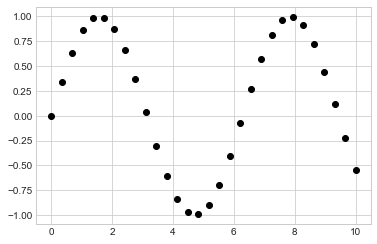

In [7]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

* 第三個參數是用來表示繪圖時的形狀。寫 'o' 就是點圖，如果寫 "-"，就會變線圖
* 至於有多少 marker 可以用，可以查 `plt.plot` 或 Matplotlib的說明文件
* 這邊舉例如下：

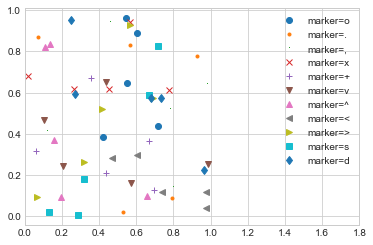

In [10]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label= f"marker={marker}")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

* 我們可以在 marker 的地方，一次定義多個特性(我要線條(-), 點(o), 以及黑色 (k))

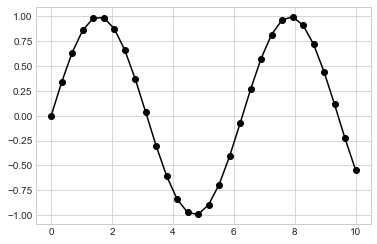

In [11]:
plt.plot(x, y, '-ok'); # line (-), circle marker (o), black (k)

* 還有一些額外的參數，可以做更多的設定：

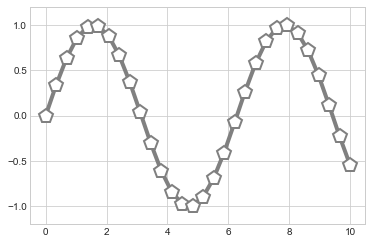

In [12]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## 用 `plt.scatter` 畫散布圖

* 另一種畫散布圖的方式是 `plt.scatter`，語法幾乎一樣：

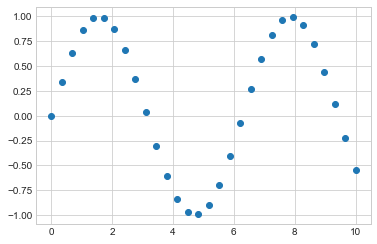

In [13]:
plt.scatter(x, y, marker='o');

* 那，`plt.plot()` 和 `plt.scatter()` 差在哪？ 差在， `plt.scatter()` 可以控制 "每一個點" 屬性(大小, 顏色, 框線...)
* 例如下例，我要畫 100 個點，然後我想要讓這 100 個點的大小和顏色都不同：  

/var/folders/j9/71c8r2vs343cb9329xbww0240000gn/T/ipykernel_25172/448753288.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();  # show color scale


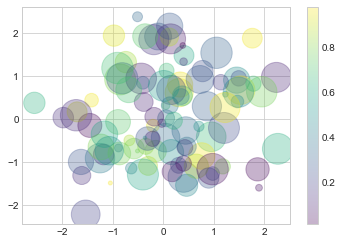

In [16]:
rng = np.random.RandomState(0);

# 生出 100 個 (x, y)
x = rng.randn(100)
y = rng.randn(100)

# 定義 100 個點各自的顏色和大小
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

# 畫圖，而且 mapping 每個點的屬性
plt.scatter(x, y, 
            c=colors, 
            s=sizes, 
            alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

* 再來，看一個統計畫圖常用的技巧，除了 (x,y) 描點外，點的大小 depend on 某個連續變數，點的顏色 depend on 某個類別變數. 
* 用 iris data 來當例子

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T #四個變數
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* feature的部分，有上面這四個，所以我想用 `features[0]`(sepal length，花萼長度) 和 `features[1]`(sepal width，花萼寬度) 來描點
* 點的大小用 `features[2]` (petal length，花瓣長度)
* 點的顏色，用 response variable : iris.target (花的種類)

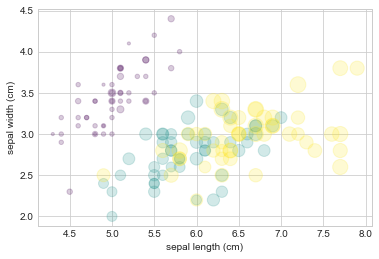

In [25]:
plt.scatter(features[0], 
            features[1], 
            alpha=0.2,
            s=100*features[3], 
            c=iris.target, 
            cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

##  `plt.plot()` 和 `plt.scatter()` 的使用時機

* `plt.scatter()` 可以做比較多客製化，但缺點是，資料量大的時候效率不佳(因為為了達到每個點的設定，背後多做很多事). 
* 所以，資料量小的時候(幾百個點)，可以善用 `plt.scatter()`，但資料量大時，就用 `plt.plot()` 比較有效率